Cette analyse s'inscrit dans le cadre d'une étude de marché pour une entreprise agro-alimentaire fictive :

L'entreprise La Poule qui Chante a pour activité principale l'élevage et la vente sous le label "Agriculture Biologique". Elle est installée en France et souhaite s'étendre à de nouveaux pays. L'objectif est de conduire une étude de marché dans les pays du monde pour prioriser / aider à la décision pour le choix du pays.

Pour conduire cette analyse de marché, des données du FAO et de la Banque Mondiale ont été utilisée.


# Analyse exploratoire des données

## 1 - Bibliothèques et fonctions

### 1-1 Import des bibliothèques

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

### 1-2 Fonctions

Différentes fonctions utilisées dans ce notebook

In [88]:
# Crée les boxplots de chacune des colonnes du dataframe
def boxplot_columns(df: pd.DataFrame) -> go.Figure:
    """Crée des boxplots dans des graphiques séparés pour toute les colonnes d'un dataframe

    Args:
        df (pd.DataFrame): Dataframe à analyser

    Returns: 
        Graph plotply
    """

    # Exclusion des colonnes non numériques
    df_num =  df.select_dtypes(include=['number'])

    # Déterminer le nombre de colonnes d'export à tracer
    export_columns = [col for col in df_num.columns]

    # Création de la figure avec plusieurs sous-graphes
    fig = make_subplots(rows=1, cols=len(export_columns), subplot_titles=export_columns)

    # Ajout des traces aux sous-graphes
    for i, col in enumerate(export_columns):
        trace = go.Box(
            y=df[col], 
            name=col, 
            boxpoints='all',  # Affiche tous les points
            hovertext=df.pays
        )
        fig.add_trace(trace, row=1, col=i+1)

    # Mise en forme des sous-graphes
    fig.update_layout(
        width=1700,  # Largeur de la figure en pixels
        height=600   # Hauteur de la figure en pixels
    )

    # Affichage du graphique
    fig.show()

In [89]:
def calcul_Z_score(df : pd.DataFrame, columns: list) -> pd.DataFrame:
    """Calcul le Z_score des colonnes du df passées en argument

    Args:
        df (pd.DataFrame): data
        columns (list): liste des colonnes ou appliquer le calcul du Z-score

    Returns:
        pd.DataFrame: Dataframe avec les Z-scores ajoutés
        avec le nom de la colonne précédé de Z_
    """
    seuil = 3
    print(f"seuil du z-score pour déterminer les outliers : {seuil}")
    
    for i, col in enumerate(columns):
        name_col = "Z_" + col
        df["Z"] = (df[col] - df[col].mean()) / df[col].std()
        df[name_col] = df["Z"].apply(lambda x : 1 if np.abs(x) > seuil else 0)
        # display(df[name_col].value_counts())
        
        # print("-"*100)

    return df

In [90]:
def calcul_ecart_interquartile(df : pd.DataFrame, columns: list) -> pd.DataFrame:
    """Détermine les outliers avec l'écart interquartile (IQR) :
        outlier si x < Q1 - 1.5*IQR ou x > Q3 + 1.5*IQR

    Args:
        df (pd.DataFrame): DataFrame 
        columns (list): liste de la ou des colonnes choisies

    Returns:
        pd.DataFrame: Datafraame avec ajout des colonnes débutant par IQR_
        et la colonne de référence indiquant normal ou outlier
    """
    for col in columns:
        name_col = "IQR_" + col
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1
        lim_inf = Q1 -1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        print(f"{name_col} : \nlimite_inférieure: {lim_inf}\nlimite_supérieure: {lim_sup}\n")
        df[name_col] = df[col].apply(lambda x: 1 if x < lim_inf or x > lim_sup else 0)
        display(df[name_col].value_counts())
        print("-"*100,"\n")

    return df

In [91]:
def calcul_Ecart_Absolu_Moyen(df : pd.DataFrame, columns: list) -> pd.DataFrame:
    """Calcul l'écart absolu médian (MAD)
    MAD = médiane(|Xi - médiane(X)|)

    Args:
        df (pd.DataFrame): data
        columns (list): liste des colonnes ou appliquer le calcul du MAD

    Returns:
        pd.DataFrame: Dataframe avec les MAD
        avec le nom de la colonne précédé de Z_
    """
    seuil = 3
    for col in columns:
        name_col = "MAD_" + col
        mediane_col = df[col].median()
        mad = np.median(np.abs(df[col] - mediane_col))
        print(f"{name_col} : \nlimite_inférieure: {-3}\nlimite_supérieure: {3}\n")
        df[name_col] = df[col].apply(lambda x : 1 if np.abs(x - mediane_col) > seuil * mad else 0)
        display(df[name_col].value_counts())
        print("-"*100,"\n")
    return df

## 2 - Analyse exploratoire des données

### 2-1 Import des fichiers & analyses basiques

Pour plus de facilité et s'assurer d'un jeu de données suffisant, les exports de données ont été réalisées sur les années de 2017 à 2021.

In [92]:
# VARIABLE POUR SELECTION DE L'ANNEE

ANNEE = 2021

#### Population

Import des données relatives à la population des pays du Monde

In [93]:
population = pd.read_csv("data/population_totale_rurale_urbaine_2017_2021.csv")
population.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2017,2017,1000 personnes,26558.609,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2017,2017,1000 personnes,8971.472,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,36686.784,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2018,2018,1000 personnes,27099.874,X,Ciffre de sources internationales,NaN


- Filtrage sur l'année 2021

- Suppression des colonnes inutiles

- Conversion des valeurs en nombre d'habitants (*1 000)

- Modification de type

- Remplacement noms de colonnes

In [94]:
# Filtrage sur l'année
population = population[population["Année"]==ANNEE]

# Suppression des colonnes inutiles
population = population.drop(['Code Domaine', 'Domaine', 'Code Élément',
       'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Symbole', 'Description du Symbole', 'Note'],axis=1)

# Population en milliers --> en nombre
population["Valeur"] = population["Valeur"]*1000

# Changement de type
population = population.astype({"Valeur":np.int64})

# Renomme les colonnes
population.rename(columns={"Zone":"pays", "Élément":"granularite", "Valeur":"population", "Code zone (M49)": "code_pays"},inplace=True)

In [95]:
# Pivot de granularité en colonne
population = pd.pivot_table(population,index=["code_pays", "pays"], columns="granularite", values="population").rename_axis(None, axis=1)
population = population.reset_index("pays")
population.head()

,pays,Population rurale,Population totale,Population urbaine
code_pays,,,,
4,Afghanistan,28674023.0,40099462.0,10239684.0
8,Albanie,1090487.0,2854710.0,1854317.0
12,Algérie,11317455.0,44177969.0,32651848.0
16,Samoa américaines,7172.0,45035.0,48727.0
20,Andorre,9383.0,79034.0,67893.0


Gestion des valeurs manquantes : 

Les valeurs manquantes sont peu nombreuses et dans une première approche elles ont été supprimées

In [96]:
# Côntrole des valeurs nulles
print("Valeurs nulles :\n",population.isnull().sum())

# Suppression des valeurs nulles
population = population.dropna(axis=0)

# Contrôle
print("\nAprès suppression valeurs manquantes :\n", population.isnull().sum())

Valeurs nulles :
 pays                  0
Population rurale     2
Population totale     1
Population urbaine    2
dtype: int64

Après suppression valeurs manquantes :
 pays                  0
Population rurale     0
Population totale     0
Population urbaine    0
dtype: int64


Calcul du taux de population urbaine en %

Afin d'obtenir un indicateur comparable entre pays le taux de population urbaine en % a été calculé. Dans un but de se développer à l'international, 
et vendre des poulets dans un nouveau pays, il faut que les structures commerciales type GMS soit bien présente pour vendre ces différents produits,
 et elles sont plus dévelopées dans les pays avec un fort taux de poulation urbaine


In [97]:
# Changement des noms de colonnes
population.rename(columns={"Population totale":"population_totale", "Population urbaine": "population_urbaine", "Population rurale": "population_rurale"}, inplace=True)

In [98]:
# Nombre de pays ou la somme de la population urbaine et rurales est supérieure à la population totale
population[((population["population_rurale"] + population["population_urbaine"]) > population["population_totale"])].count()

pays                  106
population_rurale     106
population_totale     106
population_urbaine    106
dtype: int64

In [99]:
# Calcul des taux de population urbaine et rurale
population["population_rurale_tx"] = population["population_rurale"] / (population["population_rurale"] + population["population_urbaine"])
population["population_urbaine_tx"] = population["population_urbaine"] / (population["population_rurale"] + population["population_urbaine"])

In [100]:
boxplot_columns(population)

In [101]:
# Suppression des colonnes inutiles
population = population.drop(columns={"population_rurale", "population_urbaine", "population_rurale_tx"}).copy()
population.head()

,pays,population_totale,population_urbaine_tx
code_pays,,,
4,Afghanistan,40099462.0,0.263138
8,Albanie,2854710.0,0.629691
12,Algérie,44177969.0,0.742606
16,Samoa américaines,45035.0,0.871697
20,Andorre,79034.0,0.878578


In [102]:
# Conversion population totale en int64
population["population_totale"] = population["population_totale"].astype(np.int64)
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 4 to 894
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pays                   233 non-null    object 
 1   population_totale      233 non-null    int64  
 2   population_urbaine_tx  233 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ KB


In [103]:
# Vérification du nom de pays dupliqué
(population.index).duplicated().sum()

np.int64(0)

In [104]:
population[population.pays.str.startswith("C")]

,pays,population_totale,population_urbaine_tx
code_pays,,,
116,Cambodge,16589023,0.246680
120,Cameroun,27198628,0.581484
124,Canada,38155012,0.816526
132,Cabo Verde,587925,0.671020
152,Chili,19493184,0.878171
156,"Chine, continentale",1425893465,0.625124
158,"Chine, Taiwan Province de",23859912,0.793231
159,Chine,1457934562,0.629991
170,Colombie,51516562,0.817403


In [105]:
# Calcul de la population mondiale et du nombre de pays
pop_mondiale = population["population_totale"].sum()
nb_pays = population.shape[0]

print(f"Population mondiale : {pop_mondiale}")
print(f"Nombre de pays total : {nb_pays}")

Population mondiale : 9365352206
Nombre de pays total : 233


#### Fichier Import_Export_Qte_Valeur_2017_2021.csv

In [106]:
import_export = pd.read_csv("data/Import_Export_Qte_Valeur_2017_2021.csv",)
import_export.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2017,2017,1000 têtes,18970.0,A,Chiffre officiel,NaN
1,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2017,2017,1000 US$,26227.0,A,Chiffre officiel,NaN
2,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2018,2018,1000 têtes,12297.0,A,Chiffre officiel,NaN
3,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2018,2018,1000 US$,14665.0,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
4,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2019,2019,1000 têtes,9067.0,A,Chiffre officiel,NaN


In [107]:
# Filtrage sur année 2021
import_export = import_export[import_export["Année"] == ANNEE]

In [108]:
import_export.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
10,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2021,2021,1000 têtes,12470.00,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
11,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2021,2021,1000 US$,5526.00,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
12,TCL,Cultures et produits animaux,4,Afghanistan,5909,Exportations - Quantité,2151,Poulets,2021,2021,1000 têtes,0.00,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
13,TCL,Cultures et produits animaux,4,Afghanistan,5922,Exportations - Valeur,2151,Poulets,2021,2021,1000 US$,0.00,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
29,TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,32613.38,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...


In [109]:
# Rappel des unités
print("Rappel des unités")
import_export.groupby("Élément")["Unité"].min()


Rappel des unités


Élément
Exportations - Quantité    1000 têtes
Exportations - Valeur        1000 US$
Importations - Quantité    1000 têtes
Importations - Valeur        1000 US$
Name: Unité, dtype: object

In [110]:
import_export.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [111]:
# Suppression des colonnes inutiles
import_export.drop(columns=['Code Domaine', 'Domaine', 'Code Élément',
       'Code Produit (CPC)', 'Code année', 'Année', 'Unité','Symbole', 'Description du Symbole', 'Note'], inplace=True)

In [112]:
# Suppression des lignes avec valeur
# import_export = import_export[~import_export["Élément"].isin(["Importations - Valeur", "Exportations - Valeur"])]

In [113]:
import_export.head()

,Code zone (M49),Zone,Élément,Produit,Valeur
10,4,Afghanistan,Importations - Quantité,Poulets,12470.00
11,4,Afghanistan,Importations - Valeur,Poulets,5526.00
12,4,Afghanistan,Exportations - Quantité,Poulets,0.00
13,4,Afghanistan,Exportations - Valeur,Poulets,0.00
29,4,Afghanistan,Importations - Quantité,"Viande, poulet, fraîche ou réfrigérée",32613.38


In [114]:
import_export = pd.pivot_table(data=import_export, values="Valeur", index=['Code zone (M49)', "Zone"], columns=["Élément", "Produit"])


In [115]:
import_export.head()

Élément                            Exportations - Quantité  \
Produit                                            Poulets   
Code zone (M49) Zone                                         
4               Afghanistan                            0.0   
8               Albanie                                NaN   
12              Algérie                                NaN   
24              Angola                                 0.0   
28              Antigua-et-Barbuda                     0.0   

Élément                                                                   \
Produit                            Viande, poulet, fraîche ou réfrigérée   
Code zone (M49) Zone                                                       
4               Afghanistan                                        13.81   
8               Albanie                                              NaN   
12              Algérie                                          1616.35   
24              Angola                                              1.87   
28              Antigua-et-Barbuda                                  0.75   

Élément                            Exportations - Valeur  \
Produit                                          Poulets   
Code zone (M49) Zone                                       
4               Afghanistan                          0.0   
8               Albanie                              NaN   
12              Algérie                              NaN   
24              Angola                               0.0   
28              Antigua-et-Barbuda                   2.0   

Élément                                                                   \
Produit                            Viande, poulet, fraîche ou réfrigérée   
Code zone (M49) Zone                                                       
4               Afghanistan                                         31.0   
8               Albanie                                              NaN   
12              Algérie                                           1538.0   
24              Angola                                               2.0   
28              Antigua-et-Barbuda                                   3.0   

Élément                            Importations - Quantité  \
Produit                                            Poulets   
Code zone (M49) Zone                                         
4               Afghanistan                        12470.0   
8               Albanie                              565.0   
12              Algérie                             5489.0   
24              Angola                               243.0   
28              Antigua-et-Barbuda                     3.0   

Élément                                                                   \
Produit                            Viande, poulet, fraîche ou réfrigérée   
Code zone (M49) Zone                                                       
4               Afghanistan                                     32613.38   
8               Albanie                                         21929.50   
12              Algérie                                             0.40   
24              Angola                                         240448.80   
28              Antigua-et-Barbuda                               5724.56   

Élément                            Importations - Valeur  \
Produit                                          Poulets   
Code zone (M49) Zone                                       
4               Afghanistan                       5526.0   
8               Albanie                           4756.0   
12              Algérie                          27315.0   
24              Angola                            1015.0   
28              Antigua-et-Barbuda                 100.0   

Élément                                                                   
Produit                            Viande, poulet, fraîche ou réfrigérée  
Code zone (M49) Zone                                               

In [116]:
import_export.reset_index("Zone", inplace=True)

In [117]:
import_export

Élément                                            Zone  \
Produit                                                   
Code zone (M49)                                           
4                                           Afghanistan   
8                                               Albanie   
12                                              Algérie   
24                                               Angola   
28                                   Antigua-et-Barbuda   
...                                                 ...   
860                                         Ouzbékistan   
862              Venezuela (République bolivarienne du)   
882                                               Samoa   
887                                               Yémen   
894                                              Zambie   

Élément         Exportations - Quantité                                        \
Produit                         Poulets Viande, poulet, fraîche ou réfrigérée   
Code zone (M49)                                                                 
4                                   0.0                                 13.81   
8                                   NaN                                   NaN   
12                                  NaN                               1616.35   
24                                  0.0                                  1.87   
28                                  0.0                                  0.75   
...                                 ...                                   ...   
860                              7322.0                                100.59   
862                                 NaN                                   NaN   
882                                 NaN                                296.02   
887                                 NaN                                   NaN   
894                              1584.0                               8974.49   

Élément         Exportations - Valeur                                        \
Produit                       Poulets Viande, poulet, fraîche ou réfrigérée   
Code zone (M49)                                                               
4                                 0.0                                  31.0   
8                                 NaN                                   NaN   
12                                NaN                                1538.0   
24                                0.0                                   2.0   
28                                2.0                                   3.0   
...                               ...                                   ...   
860                            4691.0                                 204.0   
862                               NaN                                   NaN   
882                               NaN                                  39.0   
887                               NaN                                   NaN   
894                           10420.0                               13786.0   

Élément         Importations - Quantité                                        \
Produit                         Poulets Viande, poulet, fraîche ou réfrigérée   
Code zone (M49)                                                                 
4                               12470.0                              32613.38   
8                                 565.0                              21929.50   
12                               5489.0                                  0.40   
24                                243.0                             240448.80   
28                                  3.0                               5724.56   
...                                 ...                                   ...   
860                              2380.0                              72438.36   
862                                 8.0                              13027.18   
882                                73.0 

In [118]:
# Suppression du multi-index colonne
import_export.columns = ['_'.join(col).strip() for col in import_export.columns.values]

In [119]:
import_export.head()

,Zone_,Exportations - Quantité_Poulets,"Exportations - Quantité_Viande, poulet, fraîche ou réfrigérée",Exportations - Valeur_Poulets,"Exportations - Valeur_Viande, poulet, fraîche ou réfrigérée",Importations - Quantité_Poulets,"Importations - Quantité_Viande, poulet, fraîche ou réfrigérée",Importations - Valeur_Poulets,"Importations - Valeur_Viande, poulet, fraîche ou réfrigérée"
Code zone (M49),,,,,,,,,
4,Afghanistan,0.0,13.81,0.0,31.0,12470.0,32613.38,5526.0,46139.0
8,Albanie,NaN,NaN,NaN,NaN,565.0,21929.50,4756.0,23856.0
12,Algérie,NaN,1616.35,NaN,1538.0,5489.0,0.40,27315.0,1.0
24,Angola,0.0,1.87,0.0,2.0,243.0,240448.80,1015.0,236981.0
28,Antigua-et-Barbuda,0.0,0.75,2.0,3.0,3.0,5724.56,100.0,11483.0


In [120]:
# Calcul du total de la valeur export et import
import_export["export_valeur"] = import_export["Exportations - Valeur_Poulets"] + import_export["Exportations - Valeur_Viande, poulet, fraîche ou réfrigérée"]
import_export["import_valeur"] = import_export["Importations - Valeur_Poulets"] + import_export["Importations - Valeur_Viande, poulet, fraîche ou réfrigérée"]

# Suppression des colonnes inutiles
import_export.drop(columns=["Exportations - Valeur_Poulets",
                            "Exportations - Valeur_Viande, poulet, fraîche ou réfrigérée",
                            "Importations - Valeur_Poulets",
                            "Importations - Valeur_Viande, poulet, fraîche ou réfrigérée"], inplace=True)

In [121]:
import_export.head()

,Zone_,Exportations - Quantité_Poulets,"Exportations - Quantité_Viande, poulet, fraîche ou réfrigérée",Importations - Quantité_Poulets,"Importations - Quantité_Viande, poulet, fraîche ou réfrigérée",export_valeur,import_valeur
Code zone (M49),,,,,,,
4,Afghanistan,0.0,13.81,12470.0,32613.38,31.0,51665.0
8,Albanie,NaN,NaN,565.0,21929.50,NaN,28612.0
12,Algérie,NaN,1616.35,5489.0,0.40,NaN,27316.0
24,Angola,0.0,1.87,243.0,240448.80,2.0,237996.0
28,Antigua-et-Barbuda,0.0,0.75,3.0,5724.56,5.0,11583.0


In [122]:
# Suppression des lignes totalement nulles 
import_export.dropna(axis=0, how="all")

# Remplacement des valeurs nulles par 0
import_export.fillna(0, inplace=True)

In [123]:
import_export.head()

,Zone_,Exportations - Quantité_Poulets,"Exportations - Quantité_Viande, poulet, fraîche ou réfrigérée",Importations - Quantité_Poulets,"Importations - Quantité_Viande, poulet, fraîche ou réfrigérée",export_valeur,import_valeur
Code zone (M49),,,,,,,
4,Afghanistan,0.0,13.81,12470.0,32613.38,31.0,51665.0
8,Albanie,0.0,0.00,565.0,21929.50,0.0,28612.0
12,Algérie,0.0,1616.35,5489.0,0.40,0.0,27316.0
24,Angola,0.0,1.87,243.0,240448.80,2.0,237996.0
28,Antigua-et-Barbuda,0.0,0.75,3.0,5724.56,5.0,11583.0


In [124]:
import_export.rename(columns={"Exportations - Quantité_Poulets": "export_poulets", 
                              "Exportations - Quantité_Viande, poulet, fraîche ou réfrigérée": "export_viande_poulets",
                              "Importations - Quantité_Poulets": "import_poulets", 
                              "Importations - Quantité_Viande, poulet, fraîche ou réfrigérée": "import_viande_poulets",
                              "Zone_": "pays"},inplace=True)

In [125]:
import_export.head()

,pays,export_poulets,export_viande_poulets,import_poulets,import_viande_poulets,export_valeur,import_valeur
Code zone (M49),,,,,,,
4,Afghanistan,0.0,13.81,12470.0,32613.38,31.0,51665.0
8,Albanie,0.0,0.00,565.0,21929.50,0.0,28612.0
12,Algérie,0.0,1616.35,5489.0,0.40,0.0,27316.0
24,Angola,0.0,1.87,243.0,240448.80,2.0,237996.0
28,Antigua-et-Barbuda,0.0,0.75,3.0,5724.56,5.0,11583.0


In [126]:
import_export.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 4 to 894
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pays                   195 non-null    object 
 1   export_poulets         195 non-null    float64
 2   export_viande_poulets  195 non-null    float64
 3   import_poulets         195 non-null    float64
 4   import_viande_poulets  195 non-null    float64
 5   export_valeur          195 non-null    float64
 6   import_valeur          195 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


In [127]:
import_export.describe()

,export_poulets,export_viande_poulets,import_poulets,import_viande_poulets,export_valeur,import_valeur
count,195.000000,1.950000e+02,195.000000,1.950000e+02,1.950000e+02,1.950000e+02
mean,8675.394872,7.766112e+04,7890.476923,8.423230e+04,1.452364e+05,1.608561e+05
std,35582.805488,4.125814e+05,33024.992245,2.179041e+05,6.583435e+05,4.706430e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,32.000000,2.025745e+03,0.000000e+00,6.198000e+03
50%,0.000000,1.004600e+02,427.000000,1.445554e+04,0.000000e+00,2.801600e+04
75%,707.000000,8.646570e+03,2803.000000,6.528648e+04,1.465700e+04,1.198030e+05
max,353559.000000,4.201040e+06,383520.000000,1.954731e+06,6.932799e+06,4.425756e+06


In [128]:
boxplot_columns(import_export)

In [129]:
import_export.nlargest(10, columns="import_poulets")

,pays,export_poulets,export_viande_poulets,import_poulets,import_viande_poulets,export_valeur,import_valeur
Code zone (M49),,,,,,,
528,Pays-Bas (Royaume des),353559.0,1067292.91,383520.0,530277.37,2979004.0,1717378.0
276,Allemagne,255995.0,265822.29,138707.0,475448.52,1105349.0,1413800.0
616,Pologne,48272.0,933712.24,124003.0,27278.56,2012496.0,181938.0
56,Belgique,123771.0,472928.34,120362.0,213644.02,1113495.0,627259.0
642,Roumanie,15457.0,74683.47,95619.0,88208.19,204673.0,202482.0
703,Slovaquie,25164.0,20936.98,70504.0,49317.10,86199.0,151205.0
804,Ukraine,0.0,455880.33,56262.0,110671.60,700882.0,112013.0
702,Singapour,28.0,43600.45,48409.0,147866.54,66822.0,424200.0
124,Canada,3910.0,92272.75,37770.0,147989.15,176847.0,374833.0


#### Fichier Part_PIB_US_Croissance_Valeur_US$_par_habitant.csv

In [130]:
pib = pd.read_csv("data/Part_PIB_US_Croissance_Valeur_US$_par_habitant.csv")

In [131]:
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,534.020133,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,1.492959,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,USD,513.981256,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2018,2018,%,-3.752458,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,USD,512.910125,X,Ciffre de sources internationales,NaN


In [132]:
# Filtrage sur 2021
# pib = pib[pib["Année"] == ANNEE]

In [133]:
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,534.020133,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,1.492959,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,USD,513.981256,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2018,2018,%,-3.752458,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,USD,512.910125,X,Ciffre de sources internationales,NaN


In [134]:
pib.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [135]:
# Calcul de la moyenne de la croissance sur 5 ans et du pib/habitant sur 5 ans

pib.groupby(["Élément",'Code zone (M49)', "Zone"]).agg({"Valeur" : "mean"})

Valeur
Élément                              Code zone (M49) Zone                                               
Croissance annuelle US$ par habitant 4               Afghanistan                               -6.267633
                                     8               Albanie                                    8.578474
                                     12              Algérie                                    1.790972
                                     20              Andorre                                    1.228459
                                     24              Angola                                     3.418421
...                                                                                                  ...
Valeur US $ par habitant             860             Ouzbékistan                             1926.801079
                                     862             Venezuela (République bolivarienne du)  5383.261658
                                     882             Samoa                                   4074.624568
                                     887             Yémen                                    463.394229
                                     894             Zambie                                  1297.570770

[422 rows x 1 columns]

In [136]:
# Affichage des unités du DF
print("Rappel des unités")
pib.groupby("Élément")[["Produit", "Unité"]].min()

Rappel des unités


,Produit,Unité
Élément,,
Croissance annuelle US$ par habitant,Produit Intérieur Brut,%
Valeur US $ par habitant,Produit Intérieur Brut,USD


In [137]:
pib = pd.pivot_table(data=pib, values="Valeur", index=['Code zone (M49)', "Zone"], columns="Élément").rename_axis(None, axis=1)
pib.reset_index("Zone", inplace=True)

In [138]:
pib.head()

,Zone,Croissance annuelle US$ par habitant,Valeur US $ par habitant
Code zone (M49),,,
4,Afghanistan,-6.267633,466.065575
8,Albanie,8.578474,5562.400440
12,Algérie,1.790972,3942.852516
20,Andorre,1.228459,41072.017758
24,Angola,3.418421,2783.809186


In [139]:
pib.rename(columns={"Croissance annuelle US$ par habitant": "croissance_par_habitant",
                    "Valeur US $ par habitant": "PIB_par_habitant",
                    "Zone": "pays"}, inplace=True)

In [140]:
pib.head()

,pays,croissance_par_habitant,PIB_par_habitant
Code zone (M49),,,
4,Afghanistan,-6.267633,466.065575
8,Albanie,8.578474,5562.400440
12,Algérie,1.790972,3942.852516
20,Andorre,1.228459,41072.017758
24,Angola,3.418421,2783.809186


In [141]:
boxplot_columns(pib)

#### production_animaux_viande_poulet_poulet_2017_2022.csv

In [142]:
production = pd.read_csv("data/Prix_production_$tonne_2017_2021.csv")
production.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
0,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,US$,2016.6,A,Chiffre officiel
1,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2018,2018,7021,Valeur annuel,US$,2082.8,A,Chiffre officiel
2,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2019,2019,7021,Valeur annuel,US$,1794.0,A,Chiffre officiel
3,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,7021,Valeur annuel,US$,1612.7,A,Chiffre officiel
4,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,7021,Valeur annuel,US$,1791.2,A,Chiffre officiel


In [143]:
# Filtrage sur l'année
production = production[production["Année"]==ANNEE]

In [144]:
# Affichage des unités du DF
print("Rappel des unités")
production.groupby("Élément")[["Produit", "Unité"]].min()

Rappel des unités


,Produit,Unité
Élément,,
Prix à la Production (USD/tonne),"Viande poids vif, poulet, fraîche ou réfrigérée",US$


In [145]:
production.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Code Mois', 'Mois', 'Unité', 'Valeur', 'Symbole',
       'Description du Symbole'],
      dtype='object')

In [146]:
production.drop(columns=['Code Domaine', 'Domaine', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Code année', 'Année',
       'Code Mois', 'Mois', 'Unité','Symbole',
       'Description du Symbole'], inplace=True)

In [147]:
production.head()

,Code zone (M49),Zone,Produit,Valeur
4,710,Afrique du Sud,"Viande, poulet, fraîche ou réfrigérée",1791.2
10,8,Albanie,"Viande poids vif, poulet, fraîche ou réfrigérée",3183.2
16,12,Algérie,"Viande, poulet, fraîche ou réfrigérée",2467.9
21,276,Allemagne,"Viande poids vif, poulet, fraîche ou réfrigérée",1030.2
27,276,Allemagne,"Viande, poulet, fraîche ou réfrigérée",1392.1


<Axes: ylabel='Valeur'>

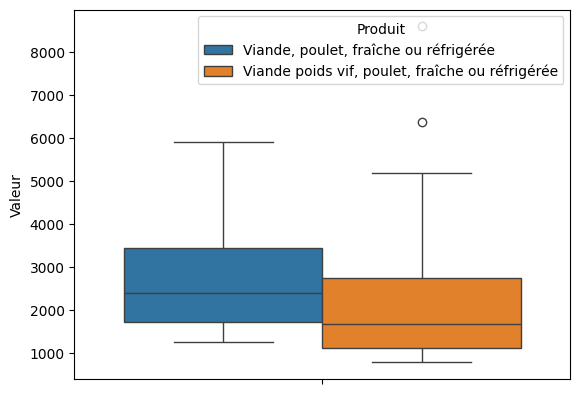

In [148]:
sns.boxplot(production, y="Valeur", hue="Produit")

In [149]:
production.groupby("Zone")["Valeur"].mean()

Zone
Afrique du Sud           1791.20
Albanie                  3183.20
Algérie                  2467.90
Allemagne                1211.15
Antigua-et-Barbuda       2648.10
                          ...   
Viet Nam                 3986.90
Yémen                    2343.20
Égypte                   2400.80
Équateur                 1766.70
États-Unis d'Amérique    1172.90
Name: Valeur, Length: 88, dtype: float64

Moins de 100 pays : indicateurs non retenu

#### Disponibilités_utilisations_importation_exportation_2017_2021.csv

In [150]:
dispo = pd.read_csv("data/Disponibilités_utilisations_importation_exportation_2017_2021.csv")
dispo.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,27849.94,I,Valeur imputée,NaN
1,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,28937.00,A,Chiffre officiel,NaN
2,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5141,Disponibilité alimentaire en quantité (tonnes),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,63514.11,E,Valeur estimée,NaN
3,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,665,Disponibilité alimentaire en quantité (g/perso...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,g/personne/jour,4.88,X,Ciffre de sources internationales,Chiffre non officiel
4,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,29073.16,I,Valeur imputée,NaN


In [151]:
# Affichage des unités du DF
print("Rappel des unités")
dispo.groupby("Élément")[["Produit", "Unité"]].min()

Rappel des unités


,Produit,Unité
Élément,,
Autres utilisations (non alimentaire),"Viande, poulet, fraîche ou réfrigérée",tonnes
Disponibilité alimentaire en quantité (g/personne/jour),"Viande, poulet, fraîche ou réfrigérée",g/personne/jour
Disponibilité alimentaire en quantité (tonnes),"Viande, poulet, fraîche ou réfrigérée",tonnes
Exportations - quantité,"Viande, poulet, fraîche ou réfrigérée",tonnes
Importations - quantité,"Viande, poulet, fraîche ou réfrigérée",tonnes
Production,"Viande, poulet, fraîche ou réfrigérée",tonnes
Transformés,"Viande, poulet, fraîche ou réfrigérée",tonnes


In [152]:
# Filtrage sur l'année
dispo = dispo[dispo["Année"] == ANNEE]

In [153]:
dispo.drop(columns=['Code Domaine', 'Domaine', 'Code Élément',
       'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Symbole', 'Description du Symbole', 'Note'], inplace=True)

In [154]:
dispo.head()

,Code zone (M49),Zone,Élément,Valeur
18,4,Afghanistan,Production,28480.02
19,4,Afghanistan,Importations - quantité,32613.38
20,4,Afghanistan,Exportations - quantité,13.81
21,4,Afghanistan,Disponibilité alimentaire en quantité (tonnes),60165.64
22,4,Afghanistan,Disponibilité alimentaire en quantité (g/perso...,4.11


In [155]:
# Pivot du  DF selon Eléments
dispo = pd.pivot_table(data=dispo, values="Valeur", columns="Élément", index=["Code zone (M49)", "Zone"]).rename_axis(None, axis=1)
dispo.reset_index("Zone", inplace=True)

In [156]:
dispo.dropna(axis=0, how="all")

,Zone,Autres utilisations (non alimentaire),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité alimentaire en quantité (tonnes),Exportations - quantité,Importations - quantité,Production,Transformés
Code zone (M49),,,,,,,,
4,Afghanistan,NaN,4.11,60165.64,13.81,32613.38,28480.02,NaN
8,Albanie,NaN,33.76,35179.50,NaN,21929.50,13250.00,NaN
12,Algérie,NaN,16.86,271904.25,1616.35,0.40,273520.20,NaN
24,Angola,NaN,23.49,295831.67,1.87,240448.80,55384.74,NaN
28,Antigua-et-Barbuda,NaN,169.21,5757.41,0.75,5724.56,33.60,NaN
...,...,...,...,...,...,...,...,...
860,Ouzbékistan,NaN,15.75,195937.77,100.59,72438.36,123600.00,0.0
862,Venezuela (République bolivarienne du),NaN,43.27,445423.06,NaN,13027.18,432395.88,0.0
882,Samoa,0.0,190.43,15205.96,296.02,20098.65,403.33,NaN


In [157]:
# Remplacement des valeurs manquantes par 0
dispo.fillna(0, inplace=True)

In [158]:
# Vérification d'éventuels doublons de nom de pays
print(f"Nombre de pays dans le DF : {dispo.shape[0]}")
print(f"Nb valeurs uniques : {dispo.index.nunique()}")

Nombre de pays dans le DF : 189
Nb valeurs uniques : 189


In [159]:
dispo.columns

Index(['Zone', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire en quantité (g/personne/jour)',
       'Disponibilité alimentaire en quantité (tonnes)',
       'Exportations - quantité', 'Importations - quantité', 'Production',
       'Transformés'],
      dtype='object')

In [160]:
# Modifications des noms des colonnes
dispo.rename(columns={'Autres utilisations (non alimentaire)': "utilisations_autres",
        'Disponibilité alimentaire en quantité (g/personne/jour)' : "dispo_alimentaire_qte_personne_jour",
        'Disponibilité alimentaire en quantité (tonnes)' : "dispo_alimentaire_en_t",
        'Exportations - quantité' : "export_qte",
        'Importations - quantité' : "import_qte",
        'Production' : "production",
        'Transformés' : "transformés",
        "Zone": "pays"}, inplace=True)

In [161]:
dispo

,pays,utilisations_autres,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production,transformés
Code zone (M49),,,,,,,,
4,Afghanistan,0.0,4.11,60165.64,13.81,32613.38,28480.02,0.0
8,Albanie,0.0,33.76,35179.50,0.00,21929.50,13250.00,0.0
12,Algérie,0.0,16.86,271904.25,1616.35,0.40,273520.20,0.0
24,Angola,0.0,23.49,295831.67,1.87,240448.80,55384.74,0.0
28,Antigua-et-Barbuda,0.0,169.21,5757.41,0.75,5724.56,33.60,0.0
...,...,...,...,...,...,...,...,...
860,Ouzbékistan,0.0,15.75,195937.77,100.59,72438.36,123600.00,0.0
862,Venezuela (République bolivarienne du),0.0,43.27,445423.06,0.00,13027.18,432395.88,0.0
882,Samoa,0.0,190.43,15205.96,296.02,20098.65,403.33,0.0


In [162]:
# Suppression des colonnes inutiles
dispo.drop(columns=["utilisations_autres", "transformés"], inplace=True)

In [163]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 4 to 894
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   pays                                 189 non-null    object 
 1   dispo_alimentaire_qte_personne_jour  189 non-null    float64
 2   dispo_alimentaire_en_t               189 non-null    float64
 3   export_qte                           189 non-null    float64
 4   import_qte                           189 non-null    float64
 5   production                           189 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.4+ KB


#### Source/DAN-P9-data/DisponibiliteAlimentaire_2017.csv

In [166]:
disponibilites = pd.read_csv("data/DisponibiliteAlimentaire_2017.csv")

In [167]:
disponibilites.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [168]:
disponibilites["Élément"].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [172]:
# Filtrage sur 'Viande de Volailles'
d = disponibilites[disponibilites["Produit"] == 'Viande de Volailles']
d.head()


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [173]:
d["Élément"].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [174]:
disponibilites.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [175]:
disponibilites[(disponibilites["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)") & (disponibilites["Produit"] == "Viande de Volailles")]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
660,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,0.54,Fc,Donnée calculée
1715,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,14.11,Fc,Donnée calculée
2722,FBS,Nouveaux Bilans Alimentaire,3,Albanie,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,6.26,Fc,Donnée calculée
3783,FBS,Nouveaux Bilans Alimentaire,4,Algérie,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.97,Fc,Donnée calculée
4883,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,7.96,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172339,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,7.23,Fc,Donnée calculée
173398,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,4.01,Fc,Donnée calculée
174327,FBS,Nouveaux Bilans Alimentaire,249,Yémen,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,3.04,Fc,Donnée calculée
175372,FBS,Nouveaux Bilans Alimentaire,251,Zambie,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.15,Fc,Donnée calculée


In [176]:
dispo

,pays,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production
Code zone (M49),,,,,,
4,Afghanistan,4.11,60165.64,13.81,32613.38,28480.02
8,Albanie,33.76,35179.50,0.00,21929.50,13250.00
12,Algérie,16.86,271904.25,1616.35,0.40,273520.20
24,Angola,23.49,295831.67,1.87,240448.80,55384.74
28,Antigua-et-Barbuda,169.21,5757.41,0.75,5724.56,33.60
...,...,...,...,...,...,...
860,Ouzbékistan,15.75,195937.77,100.59,72438.36,123600.00
862,Venezuela (République bolivarienne du),43.27,445423.06,0.00,13027.18,432395.88
882,Samoa,190.43,15205.96,296.02,20098.65,403.33


In [177]:
# calculer la disponibilite alimentaire de viande de poulet par rapport à la dispo totale
mask = disponibilites["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)"
dispo_alim_totale = disponibilites[mask].groupby("Code zone").agg({"Code zone": "min", "Zone": "min", "Valeur" : "sum"})
dispo_alim_totale.rename(columns={"Valeur": "dispo_totale_g_j_personne"}, inplace=True)

# mask_volaille = (disponibilites["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)") & (disponibilites["Produit"] == "Viande de Volailles")
dispo_alim_volaille = disponibilites[(disponibilites["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)") & (disponibilites["Produit"] == "Viande de Volailles")]

dispo_alim = pd.merge(left=dispo_alim_totale, right=dispo_alim_volaille[["Zone", "Valeur"]], how="outer", on="Zone")
dispo_alim["dispo_alim_volaille_%"] = dispo_alim["Valeur"] / dispo_alim["dispo_totale_g_j_personne"]
dispo_alim.rename(columns={"Valeur": "dispo_alim_volaille"}, inplace=True)
dipo_alim = dispo_alim.set_index("Code zone", inplace=True)
# d["dispo_alim_volaille_sur_total"] = d[""]
dispo_alim

# dispo_alim_volaille.shape


,Zone,dispo_totale_g_j_personne,dispo_alim_volaille,dispo_alim_volaille_%
Code zone,,,,
2,Afghanistan,0.54,0.54,1.0
202,Afrique du Sud,14.11,14.11,1.0
3,Albanie,6.26,6.26,1.0
4,Algérie,1.97,1.97,1.0
79,Allemagne,7.96,7.96,1.0
...,...,...,...,...
225,Émirats arabes unis,14.80,14.80,1.0
58,Équateur,6.15,6.15,1.0
231,États-Unis d'Amérique,19.93,19.93,1.0


In [178]:
dispo_alim_totale

,Code zone,Zone,dispo_totale_g_j_personne
Code zone,,,
1,1,Arménie,5.44
2,2,Afghanistan,0.54
3,3,Albanie,6.26
4,4,Algérie,1.97
7,7,Angola,3.60
...,...,...,...
255,255,Belgique,4.57
256,256,Luxembourg,7.19
272,272,Serbie,3.50


#### Stabilité_politique.csv

In [179]:
stabilite = pd.read_csv("data/Stabilité_politique.csv")
stabilite.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2017,2017,NaN,-2.79,X,Figure from international organizations,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2018,2018,NaN,-2.75,X,Figure from international organizations,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2019,2019,NaN,-2.65,X,Figure from international organizations,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2020,2020,NaN,-2.70,X,Figure from international organizations,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2021,2021,NaN,-2.52,X,Figure from international organizations,NaN


In [180]:
# Filtre sur l'année
stabilite = stabilite[stabilite["Year"] == ANNEE]
stabilite.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
4,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2021,2021,NaN,-2.52,X,Figure from international organizations,NaN
9,FS,Suite of Food Security Indicators,8,Albania,6125,Value,21032,Political stability and absence of violence/te...,2021,2021,NaN,0.20,X,Figure from international organizations,NaN
14,FS,Suite of Food Security Indicators,12,Algeria,6125,Value,21032,Political stability and absence of violence/te...,2021,2021,NaN,-0.99,X,Figure from international organizations,NaN
19,FS,Suite of Food Security Indicators,16,American Samoa,6125,Value,21032,Political stability and absence of violence/te...,2021,2021,NaN,1.07,X,Figure from international organizations,NaN
24,FS,Suite of Food Security Indicators,20,Andorra,6125,Value,21032,Political stability and absence of violence/te...,2021,2021,NaN,1.58,X,Figure from international organizations,NaN


In [181]:
# Affichage des unités du DF
print("Rappel des unités")
stabilite.groupby("Item")["Unit"].min()

Rappel des unités


Item
Political stability and absence of violence/terrorism (index)   NaN
Name: Unit, dtype: float64

In [182]:
stabilite.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [183]:
# Suppression des colonnes inutiles
stabilite = stabilite.drop(columns=['Domain Code', 'Domain', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 
       'Flag', 'Flag Description', 'Note'])

In [184]:
stabilite.head()

,Area Code (M49),Area,Value
4,4,Afghanistan,-2.52
9,8,Albania,0.20
14,12,Algeria,-0.99
19,16,American Samoa,1.07
24,20,Andorra,1.58


In [185]:
# Changement nom des colonnes
stabilite.rename(columns={"Area": "pays", "Value":"stabilite_indice"}, inplace=True)

In [186]:
# Pays en index
stabilite.set_index("Area Code (M49)", inplace=True)

In [187]:
stabilite.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 4 to 716
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pays              196 non-null    object 
 1   stabilite_indice  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [188]:
stabilite.describe()

,stabilite_indice
count,196.000000
mean,-0.076531
std,0.990736
min,-2.730000
25%,-0.690000
50%,-0.005000
75%,0.792500
max,1.880000


In [189]:
boxplot_columns(stabilite)

### 2-2 Fusion des fichiers

#### population & disponibilités

In [190]:
df = pd.merge(left=population, right=dispo, indicator=True, left_index=True, right_index=True, how='outer')


In [191]:
df.shape

(233, 10)

In [192]:
df.head()

,pays_x,population_totale,population_urbaine_tx,pays_y,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production,_merge
4,Afghanistan,40099462,0.263138,Afghanistan,4.11,60165.64,13.81,32613.38,28480.02,both
8,Albanie,2854710,0.629691,Albanie,33.76,35179.50,0.00,21929.50,13250.00,both
12,Algérie,44177969,0.742606,Algérie,16.86,271904.25,1616.35,0.40,273520.20,both
16,Samoa américaines,45035,0.871697,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,Andorre,79034,0.878578,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [193]:
# Liste des pays non présents 
df[df["_merge"] != "both"][["pays_y", "pays_x", "_merge"]]

,pays_y,pays_x,_merge
16,NaN,Samoa américaines,left_only
20,NaN,Andorre,left_only
60,NaN,Bermudes,left_only
92,NaN,Îles Vierges britanniques,left_only
96,NaN,Brunéi Darussalam,left_only
136,NaN,Îles Caïmanes,left_only
175,NaN,Mayotte,left_only
184,NaN,Îles Cook,left_only
226,NaN,Guinée équatoriale,left_only
232,NaN,Érythrée,left_only


In [194]:
print(f"Le détail du résultat de la fusion est : \n{df._merge.value_counts()}")


Le détail du résultat de la fusion est : 
_merge
both          189
left_only      44
right_only      0
Name: count, dtype: int64


In [195]:
# Conservation uniquement des lignes avec correspondances entre les 2 fichiers
df = df[df["_merge"] == "both"]
df.drop(columns=["_merge", "pays_y"], inplace=True)
df.rename(columns={"pays_x": "pays"}, inplace=True)
df.shape

(189, 8)

In [196]:
df.head()

,pays,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production
4,Afghanistan,40099462,0.263138,4.11,60165.64,13.81,32613.38,28480.02
8,Albanie,2854710,0.629691,33.76,35179.50,0.00,21929.50,13250.00
12,Algérie,44177969,0.742606,16.86,271904.25,1616.35,0.40,273520.20
24,Angola,34503774,0.674598,23.49,295831.67,1.87,240448.80,55384.74
28,Antigua-et-Barbuda,93219,0.243797,169.21,5757.41,0.75,5724.56,33.60


#### ajout de PIB

In [197]:
df = df.merge(right=pib, how="outer", left_index=True, right_index=True, indicator=True)

In [198]:
print(f"Le détail du résultat de la fusion est : \n{df._merge.value_counts()}")

Le détail du résultat de la fusion est : 
_merge
both          188
right_only     23
left_only       1
Name: count, dtype: int64


In [199]:
df.head()

,pays_x,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production,pays_y,croissance_par_habitant,PIB_par_habitant,_merge
4,Afghanistan,40099462.0,0.263138,4.11,60165.64,13.81,32613.38,28480.02,Afghanistan,-6.267633,466.065575,both
8,Albanie,2854710.0,0.629691,33.76,35179.50,0.00,21929.50,13250.00,Albanie,8.578474,5562.400440,both
12,Algérie,44177969.0,0.742606,16.86,271904.25,1616.35,0.40,273520.20,Algérie,1.790972,3942.852516,both
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorre,1.228459,41072.017758,right_only
24,Angola,34503774.0,0.674598,23.49,295831.67,1.87,240448.80,55384.74,Angola,3.418421,2783.809186,both


In [200]:
# Liste des pays non présents 
df[df["_merge"] != "both"][["pays_y", "pays_x", "_merge"]]

,pays_y,pays_x,_merge
20,Andorre,NaN,right_only
60,Bermudes,NaN,right_only
92,Îles Vierges britanniques,NaN,right_only
96,Brunéi Darussalam,NaN,right_only
136,Îles Caïmanes,NaN,right_only
158,NaN,"Chine, Taiwan Province de",left_only
184,Îles Cook,NaN,right_only
226,Guinée équatoriale,NaN,right_only
232,Érythrée,NaN,right_only
275,Palestine,NaN,right_only


In [201]:
# Conservation uniquement des lignes avec correspondances entre les 2 fichiers
df = df[df["_merge"] == "both"]
df.drop(columns=["_merge", "pays_y"], inplace=True)
df.rename(columns={"pays_x": "pays"}, inplace=True)
df.shape

(188, 10)

#### ajout de stabilité

In [202]:
df = df.merge(right=stabilite, how="outer", left_index=True, right_index=True, indicator=True)

In [203]:
print(f"Le détail du résultat de la fusion est : \n{df._merge.value_counts()}")

Le détail du résultat de la fusion est : 
_merge
both          184
right_only     12
left_only       4
Name: count, dtype: int64


In [204]:
df.columns

Index(['pays_x', 'population_totale', 'population_urbaine_tx',
       'dispo_alimentaire_qte_personne_jour', 'dispo_alimentaire_en_t',
       'export_qte', 'import_qte', 'production', 'croissance_par_habitant',
       'PIB_par_habitant', 'pays_y', 'stabilite_indice', '_merge'],
      dtype='object')

In [205]:
# Liste des pays non présents 
df[df["_merge"] != "both"][["pays_y", "pays_x", "_merge"]]

,pays_y,pays_x,_merge
16,American Samoa,NaN,right_only
20,Andorra,NaN,right_only
60,Bermuda,NaN,right_only
96,Brunei Darussalam,NaN,right_only
156,NaN,"Chine, continentale",left_only
159,NaN,Chine,left_only
226,Equatorial Guinea,NaN,right_only
232,Eritrea,NaN,right_only
258,NaN,Polynésie française,left_only
275,Palestine,NaN,right_only


In [206]:
# Conservation uniquement des lignes avec correspondances entre les 2 fichiers
df = df[df["_merge"] == "both"]
df.drop(columns=["_merge", "pays_y"], inplace=True)
df.rename(columns={"pays_x": "pays"}, inplace=True)
df.shape

(184, 11)

In [207]:
stabilite[stabilite.pays.str.lower().str.contains('chin')]

,pays,stabilite_indice
Area Code (M49),,
344,"China, Hong Kong SAR",0.26
446,"China, Macao SAR",1.03


#### ajout de disponibilités_volaille_%

In [208]:
df

,pays,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production,croissance_par_habitant,PIB_par_habitant,stabilite_indice
4,Afghanistan,40099462.0,0.263138,4.11,60165.64,13.81,32613.38,28480.02,-6.267633,466.065575,-2.52
8,Albanie,2854710.0,0.629691,33.76,35179.50,0.00,21929.50,13250.00,8.578474,5562.400440,0.20
12,Algérie,44177969.0,0.742606,16.86,271904.25,1616.35,0.40,273520.20,1.790972,3942.852516,-0.99
24,Angola,34503774.0,0.674598,23.49,295831.67,1.87,240448.80,55384.74,3.418421,2783.809186,-0.71
28,Antigua-et-Barbuda,93219.0,0.243797,169.21,5757.41,0.75,5724.56,33.60,3.405678,17122.683861,0.95
...,...,...,...,...,...,...,...,...,...,...,...
860,Ouzbékistan,34081449.0,0.504272,15.75,195937.77,100.59,72438.36,123600.00,-1.227649,1926.801079,-0.25
862,Venezuela (République bolivarienne du),28199867.0,0.883251,43.27,445423.06,0.00,13027.18,432395.88,-9.950872,5383.261658,-1.45
882,Samoa,218764.0,0.177421,190.43,15205.96,296.02,20098.65,403.33,-1.459197,4074.624568,1.11
887,Yémen,32981641.0,0.385463,28.73,345878.62,0.00,147000.04,198878.58,-5.181772,463.394229,-2.58


In [209]:
# df = df.merge(right=dispo_alim, how="outer", left_index=True, right_index=True, indicator=True)
df

,pays,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,dispo_alimentaire_en_t,export_qte,import_qte,production,croissance_par_habitant,PIB_par_habitant,stabilite_indice
4,Afghanistan,40099462.0,0.263138,4.11,60165.64,13.81,32613.38,28480.02,-6.267633,466.065575,-2.52
8,Albanie,2854710.0,0.629691,33.76,35179.50,0.00,21929.50,13250.00,8.578474,5562.400440,0.20
12,Algérie,44177969.0,0.742606,16.86,271904.25,1616.35,0.40,273520.20,1.790972,3942.852516,-0.99
24,Angola,34503774.0,0.674598,23.49,295831.67,1.87,240448.80,55384.74,3.418421,2783.809186,-0.71
28,Antigua-et-Barbuda,93219.0,0.243797,169.21,5757.41,0.75,5724.56,33.60,3.405678,17122.683861,0.95
...,...,...,...,...,...,...,...,...,...,...,...
860,Ouzbékistan,34081449.0,0.504272,15.75,195937.77,100.59,72438.36,123600.00,-1.227649,1926.801079,-0.25
862,Venezuela (République bolivarienne du),28199867.0,0.883251,43.27,445423.06,0.00,13027.18,432395.88,-9.950872,5383.261658,-1.45
882,Samoa,218764.0,0.177421,190.43,15205.96,296.02,20098.65,403.33,-1.459197,4074.624568,1.11
887,Yémen,32981641.0,0.385463,28.73,345878.62,0.00,147000.04,198878.58,-5.181772,463.394229,-2.58


Pas de stabilité politique pour la chine ...

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 4 to 894
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   pays                                 184 non-null    object 
 1   population_totale                    184 non-null    float64
 2   population_urbaine_tx                184 non-null    float64
 3   dispo_alimentaire_qte_personne_jour  184 non-null    float64
 4   dispo_alimentaire_en_t               184 non-null    float64
 5   export_qte                           184 non-null    float64
 6   import_qte                           184 non-null    float64
 7   production                           184 non-null    float64
 8   croissance_par_habitant              184 non-null    float64
 9   PIB_par_habitant                     184 non-null    float64
 10  stabilite_indice                     184 non-null    float64
dtypes: float64(10), object(1)
memory usag

Text(0.5, 1.0, 'Corrélation entre les variables')

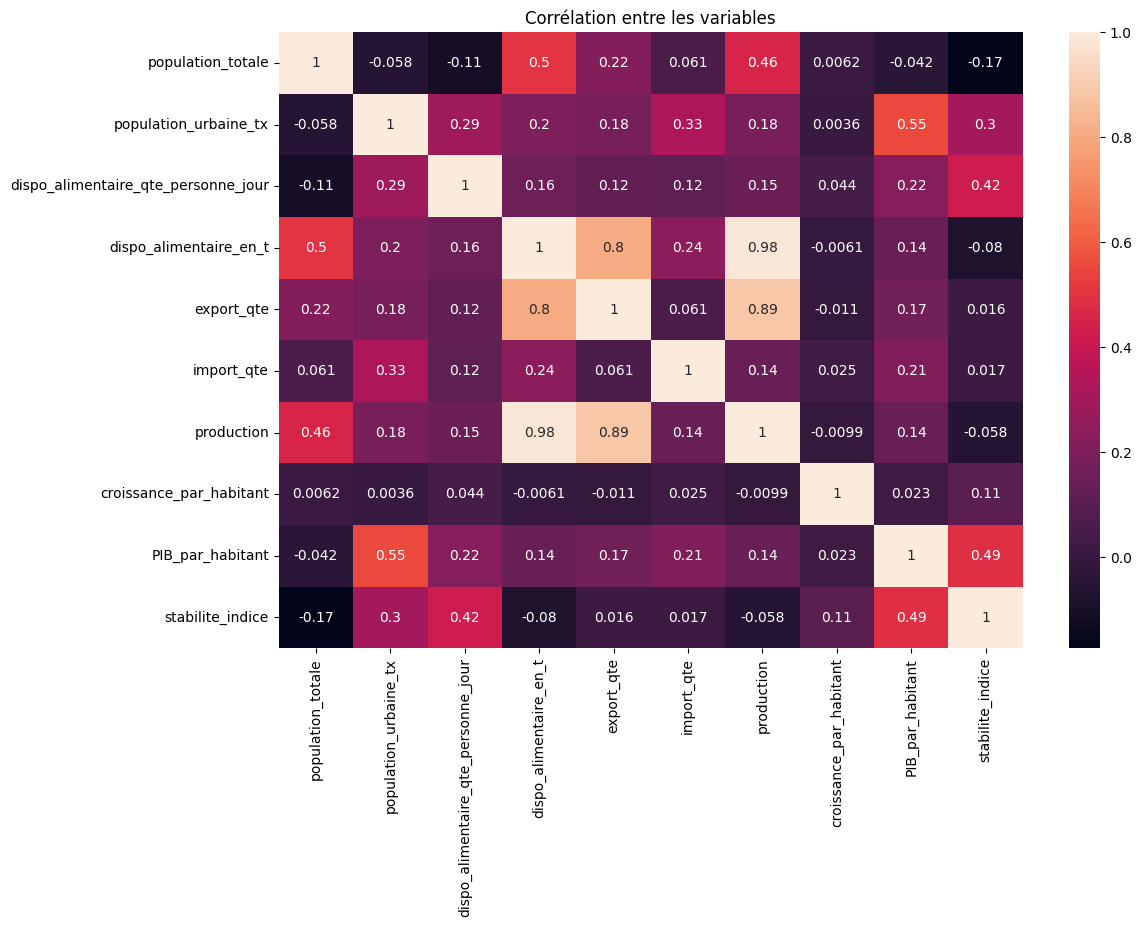

In [211]:
# Visualisation des corrélations entre variables pour vérifier s'il n'y a pas des variables trop dépendantes
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Corrélation entre les variables")

Les variables "production" et "dispo_alimentaire_en_t" sont très corrélées 

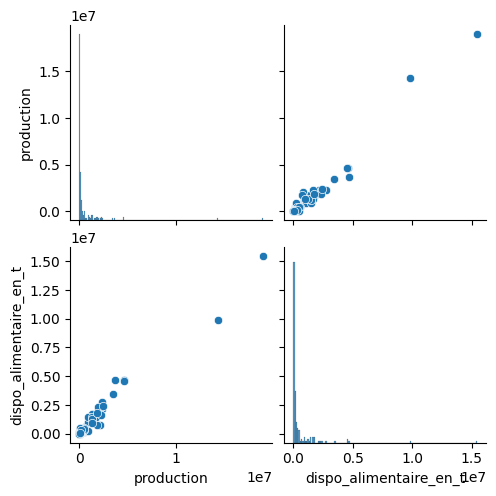

In [212]:
sns.pairplot(df[["production", "dispo_alimentaire_en_t"]])

In [213]:
test_log = df[["production", "dispo_alimentaire_en_t"]].copy()

In [214]:
test_log["dispo_alimentaire_en_t"] = np.log1p(test_log["dispo_alimentaire_en_t"])
test_log["production"] = np.log1p(test_log["production"])

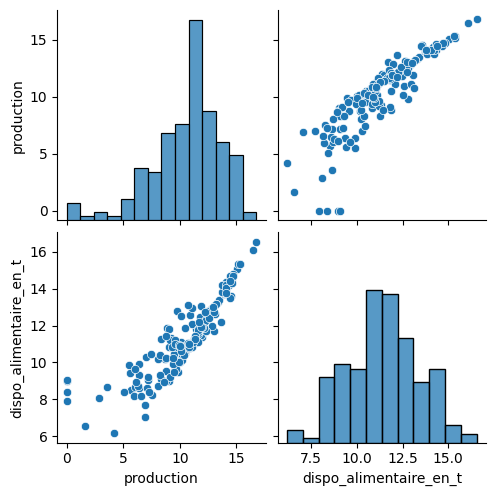

In [215]:
sns.pairplot(test_log)

In [216]:
# Suppression de la colonne dispo_alimentaire_en_t
df.drop(columns=["dispo_alimentaire_en_t"], inplace=True)
df.head()

,pays,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,export_qte,import_qte,production,croissance_par_habitant,PIB_par_habitant,stabilite_indice
4,Afghanistan,40099462.0,0.263138,4.11,13.81,32613.38,28480.02,-6.267633,466.065575,-2.52
8,Albanie,2854710.0,0.629691,33.76,0.00,21929.50,13250.00,8.578474,5562.400440,0.20
12,Algérie,44177969.0,0.742606,16.86,1616.35,0.40,273520.20,1.790972,3942.852516,-0.99
24,Angola,34503774.0,0.674598,23.49,1.87,240448.80,55384.74,3.418421,2783.809186,-0.71
28,Antigua-et-Barbuda,93219.0,0.243797,169.21,0.75,5724.56,33.60,3.405678,17122.683861,0.95


#### Verification des outliers définitive

In [217]:
boxplot_columns(df)

#### Suppression d'outliers

In [218]:
# Suppression d'outliers Tonga

In [219]:
boxplot_columns(df)

### OUTLIERS

In [220]:
cols = ['population_totale', 'population_urbaine_tx',
       'dispo_alimentaire_qte_personne_jour', 'export_qte', 'import_qte',
       'production', 'croissance_par_habitant', 'PIB_par_habitant',
       'stabilite_indice']

# Utilisation des focntions de calcul des outliers pour tester
calcul_Z_score(df, cols)
# calcul_Ecart_Absolu_Moyen(df, cols)
# calcul_ecart_interquartile(df, cols)

seuil du z-score pour déterminer les outliers : 3


,pays,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,export_qte,import_qte,production,croissance_par_habitant,PIB_par_habitant,stabilite_indice,Z,Z_population_totale,Z_population_urbaine_tx,Z_dispo_alimentaire_qte_personne_jour,Z_export_qte,Z_import_qte,Z_production,Z_croissance_par_habitant,Z_PIB_par_habitant,Z_stabilite_indice
4,Afghanistan,40099462.0,0.263138,4.11,13.81,32613.38,28480.02,-6.267633,466.065575,-2.52,-2.479671,0,0,0,0,0,0,0,0,0
8,Albanie,2854710.0,0.629691,33.76,0.00,21929.50,13250.00,8.578474,5562.400440,0.20,0.325161,0,0,0,0,0,0,0,0,0
12,Algérie,44177969.0,0.742606,16.86,1616.35,0.40,273520.20,1.790972,3942.852516,-0.99,-0.901953,0,0,0,0,0,0,0,0,0
24,Angola,34503774.0,0.674598,23.49,1.87,240448.80,55384.74,3.418421,2783.809186,-0.71,-0.613221,0,0,0,0,0,0,0,0,0
28,Antigua-et-Barbuda,93219.0,0.243797,169.21,0.75,5724.56,33.60,3.405678,17122.683861,0.95,1.098552,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Ouzbékistan,34081449.0,0.504272,15.75,100.59,72438.36,123600.00,-1.227649,1926.801079,-0.25,-0.138874,0,0,0,0,0,0,0,0,0
862,Venezuela (République bolivarienne du),28199867.0,0.883251,43.27,0.00,13027.18,432395.88,-9.950872,5383.261658,-1.45,-1.376300,0,0,0,0,0,0,1,0,0
882,Samoa,218764.0,0.177421,190.43,296.02,20098.65,403.33,-1.459197,4074.624568,1.11,1.263542,0,0,0,0,0,0,0,0,0
887,Yémen,32981641.0,0.385463,28.73,0.00,147000.04,198878.58,-5.181772,463.394229,-2.58,-2.541543,0,0,0,0,0,0,0,0,0


In [221]:
# Affichage des lignes avec valeurs considérées comme outliers
colonnes_outliers = [col for col in df.columns if (("Z_" in col) or("IQR_" in col) or ("MAD_" in col))]
# Somme des resultats dans ces colonnes
df["n_outliers"] = df[colonnes_outliers].sum(axis=1)
# df.head()
df[df["n_outliers"]==1]
# colonnes_outliers

,pays,population_totale,population_urbaine_tx,dispo_alimentaire_qte_personne_jour,export_qte,import_qte,production,croissance_par_habitant,PIB_par_habitant,stabilite_indice,...,Z_population_totale,Z_population_urbaine_tx,Z_dispo_alimentaire_qte_personne_jour,Z_export_qte,Z_import_qte,Z_production,Z_croissance_par_habitant,Z_PIB_par_habitant,Z_stabilite_indice,n_outliers
328,Guyana,8.045670e+05,0.268972,166.68,1.05,4.58,48945.00,23.878163,8975.063337,-0.14,...,0,0,0,0,0,0,1,0,0,1
356,Inde,1.407564e+09,0.353930,9.03,3371.71,141.43,4641260.08,6.438148,2106.348732,-0.69,...,1,0,0,0,0,0,0,0,0,1
372,Irlande,4.986526e+06,0.639120,54.18,56029.89,51326.25,147770.00,9.143807,87957.491401,0.84,...,0,0,0,0,0,0,0,1,0,1
392,Japon,1.246125e+08,0.918672,59.98,5301.42,595830.28,2342999.77,-2.167833,39027.510454,1.02,...,0,0,0,0,1,0,0,0,0,1
442,Luxembourg,6.393210e+05,0.916724,33.75,491.60,8366.92,0.00,3.026233,119400.271373,1.19,...,0,0,0,0,0,0,0,1,0,1
484,Mexique,1.267051e+08,0.810160,101.57,911.35,1029674.12,3668551.32,4.318605,10165.617502,-0.69,...,0,0,0,0,1,0,0,0,0,1
528,Pays-Bas (Royaume des),1.750170e+07,0.925721,30.56,1067292.91,530277.37,869380.00,4.000738,53694.465898,0.89,...,0,0,0,0,1,0,0,0,0,1
578,Norvège,5.403021e+06,0.833234,53.58,126.53,1108.94,106043.00,8.039284,83506.650848,1.09,...,0,0,0,0,0,0,0,1,0,1
682,Arabie saoudite,3.595040e+07,0.845081,113.34,40733.04,597975.48,930000.00,8.152993,23914.464589,-0.59,...,0,0,0,0,1,0,0,0,0,1
729,Soudan,4.565720e+07,0.355926,4.80,100.46,1348.25,79814.97,-10.461549,1215.116065,-1.99,...,0,0,0,0,0,0,1,0,0,1


In [222]:
# Affichage du nombre d'outliers par colonne
outliers = []

for col in colonnes_outliers:
    a = df[df[col] == 1][col].sum()
    outliers.append(a)
# display(outliers_Z_results)
pd.DataFrame(outliers, index=colonnes_outliers, columns=["n_outliers"])

,n_outliers
Z_population_totale,1
Z_population_urbaine_tx,0
Z_dispo_alimentaire_qte_personne_jour,1
Z_export_qte,2
Z_import_qte,5
Z_production,2
Z_croissance_par_habitant,3
Z_PIB_par_habitant,4
Z_stabilite_indice,0


In [223]:
# Choix des colonnes dont les outliers doivent être supprimés
colonnes_ouliers_a_supprimer =[
        # 'Z_population_totale',
        'Z_population_urbaine_tx',
        'Z_dispo_alimentaire_qte_personne_jour',
        # 'Z_export_qte',
        # 'Z_import_qte',
        'Z_production',
        'Z_croissance_par_habitant',
        'Z_PIB_par_habitant',
        'Z_stabilite_indice']

# Suppression des outliers
# df = df[df['n_outliers'] - df["Z_population_urbaine_tx"] - df["Z_population_totale"]== 0]

Après différents tests et vérifications les outliers semblent représenter la réalité de pays ayant des particularités (Chine et Inde avec leurs populations)

Suppression uniquement de Tonga et Guyana

In [224]:
df = df[df.pays != "Tonga"]
df = df[df.pays != "Guyana"]

In [225]:
# suppression des colonnes créées avec les outliers
df = df.drop(colonnes_outliers,axis=1)
df = df.drop(["Z","n_outliers"], axis=1)

In [226]:
boxplot_columns(df)

## 3 - Export des données en csv

In [227]:


# Vérification du respect de la commande : 60% de la population monidale et au moins 100 pays
if df.population_totale.sum() > 0.6*pop_mondiale:
    print(f"Les données représentent {df.population_totale.sum()/pop_mondiale:.2%} de la population mondiale")

    if df.shape[0] > 100:
        print(f"Le nombre de pays est de {df.shape[0]} (minimum 100)")
        # Conditions remplies -> Sauvegarde du dataframe prêt pour analyse exploratoire et clustering
        df.index.name ="code_pays"
        df.to_csv('donnees_nettoyees.csv', index=True,)
        print(f"Pré-requis pour l'analyse validé - Export du fichier")
        
    else: print("Les données doivent concernés au moins 100 pays")

else :
    print(f"Les données représentent {df.population_totale.sum()/pop_mondiale:.2%} de la population mondiale")
    print(f"Les données doivent représentées au moins 60 % de la population\nLe nombre de pays est de {df.shape[0]} (minimum 100)")

Les données représentent 68.40% de la population mondiale
Le nombre de pays est de 182 (minimum 100)
Pré-requis pour l'analyse validé - Export du fichier
